# Rainfall Weather Forecasting

https://github.com/Rainfall-Prediction/Rainfall-Prediction/blob/main/Data%20Exploration.ipynb
https://github.com/pnsawant/weatherAUS/blob/main/weatherAUS.ipynb
https://github.com/Gourab-DS97/ML-Project2-WeatherAUS_Rainfall_Prediction_Regression/blob/main/WeatherAUS_Rainfall_Prediction%20(Regression).ipynb

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.<br>
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. <br>
Here, predict two things:
1. Problem Statement: <br>
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.<br>
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



1.Data Loading Start the Data analysis by importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


read the csv dataset

In [4]:
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Data Preprocessing

In [5]:
df.shape

(8425, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

we observe a lot of missing values n both categorical and numerical data

In [8]:
data= df.isnull().sum(axis=0)
null_df = pd.DataFrame()
null_df['Features'] = data.index
null_df['Number of Null Values'] = data.values
null_df['% of Null Values'] = np.round((data.values/df.shape[0]) * 100,2)
display(null_df)

,Features,Number of Null Values,% of Null Values
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,75,0.89
3,MaxTemp,60,0.71
4,Rainfall,240,2.85
5,Evaporation,3512,41.69
6,Sunshine,3994,47.41
7,WindGustDir,991,11.76
8,WindGustSpeed,991,11.76
9,WindDir9am,829,9.84


In [9]:
features= null_df[null_df['% of Null Values'] > 5]['Features'].tolist()
df = df.drop(columns=features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8425 non-null   object 
 1   Location      8425 non-null   object 
 2   MinTemp       8350 non-null   float64
 3   MaxTemp       8365 non-null   float64
 4   Rainfall      8185 non-null   float64
 5   WindDir3pm    8117 non-null   object 
 6   WindSpeed9am  8349 non-null   float64
 7   WindSpeed3pm  8318 non-null   float64
 8   Humidity9am   8366 non-null   float64
 9   Humidity3pm   8323 non-null   float64
 10  Temp9am       8369 non-null   float64
 11  Temp3pm       8329 non-null   float64
 12  RainToday     8185 non-null   object 
 13  RainTomorrow  8186 non-null   object 
dtypes: float64(9), object(5)
memory usage: 921.6+ KB


In [10]:
null_df = null_df[null_df['% of Null Values'] <= 5]
display(null_df)

,Features,Number of Null Values,% of Null Values
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,75,0.89
3,MaxTemp,60,0.71
4,Rainfall,240,2.85
10,WindDir3pm,308,3.66
11,WindSpeed9am,76,0.90
12,WindSpeed3pm,107,1.27
13,Humidity9am,59,0.70
14,Humidity3pm,102,1.21


In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
df.duplicated().sum()

1663

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Date', 'Location', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


Numerical columns are: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


 Fill NaN values in ccol with mode,ncol with mean

In [16]:
df[ccol] = df[ccol].fillna(df[ccol].mode().iloc[0])
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [17]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [18]:
print("minimun date :",df["Date"].min())
print("max date :",df["Date"].max())

minimun date : 2008-12-01
max date : 2017-06-25


In [19]:
for i in ccol:
    unique_objects_count = df[i].value_counts()
    print(f"Number of unique values in {i}: {len(df[i].unique())}")
    print(unique_objects_count)
    print()

Number of unique values in Date: 3004
Date
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64

Number of unique values in Location: 12
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64

Number of unique values in WindDir3pm: 16
WindDir3pm
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: count, dtype: int64

Number of unique values in RainToday: 2
RainToday
No     5190
Yes    1572
Name: count, dtype: int64

Number of unique values in RainTomorrow: 2
RainTomorrow

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,12.782206,17.571150,67.506559,50.467147,17.895038,22.708561
std,5.540667,6.130123,10.482769,9.787577,9.548634,17.182700,18.498341,5.722411,5.971845
min,-2.000000,8.200000,0.000000,0.000000,0.000000,10.000000,6.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,6.000000,11.000000,56.000000,38.000000,13.900000,18.400000
50%,13.109145,23.500000,0.000000,11.000000,17.000000,68.000000,50.000000,17.900000,22.300000
75%,17.400000,28.400000,1.200000,19.000000,24.000000,80.000000,62.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,63.000000,83.000000,100.000000,99.000000,39.400000,44.100000


Inference:

In Australia, minimum temperature recorded is -8.5 degree centigrade while maximum recorded temperature is 48.1 degree centigrade<br>
Avg daily rainfall is 2.6 mm<br>
Avg Sunshine received is 7.54 hr<br>
The average wind gust speed is 40.39 km/hr<br>
By looking at min & max value; our assumption is: "Cloud9am" & "Cloud3pm" can be Ordinal Variable<br>
For Rainfall column; Standard Deviation = 9.1 & Mean = 2.6<br>
Similarly for RISK_MM column; Standard Deviation = 8.9 Mean = 2.6<br>
Since (SD / Mean) > 1; so Mean values of these 2 columns ('Rainfall' & 'RISK_MM') are not reliable.<br>

# Data Visulaization

Uni-varient analysis

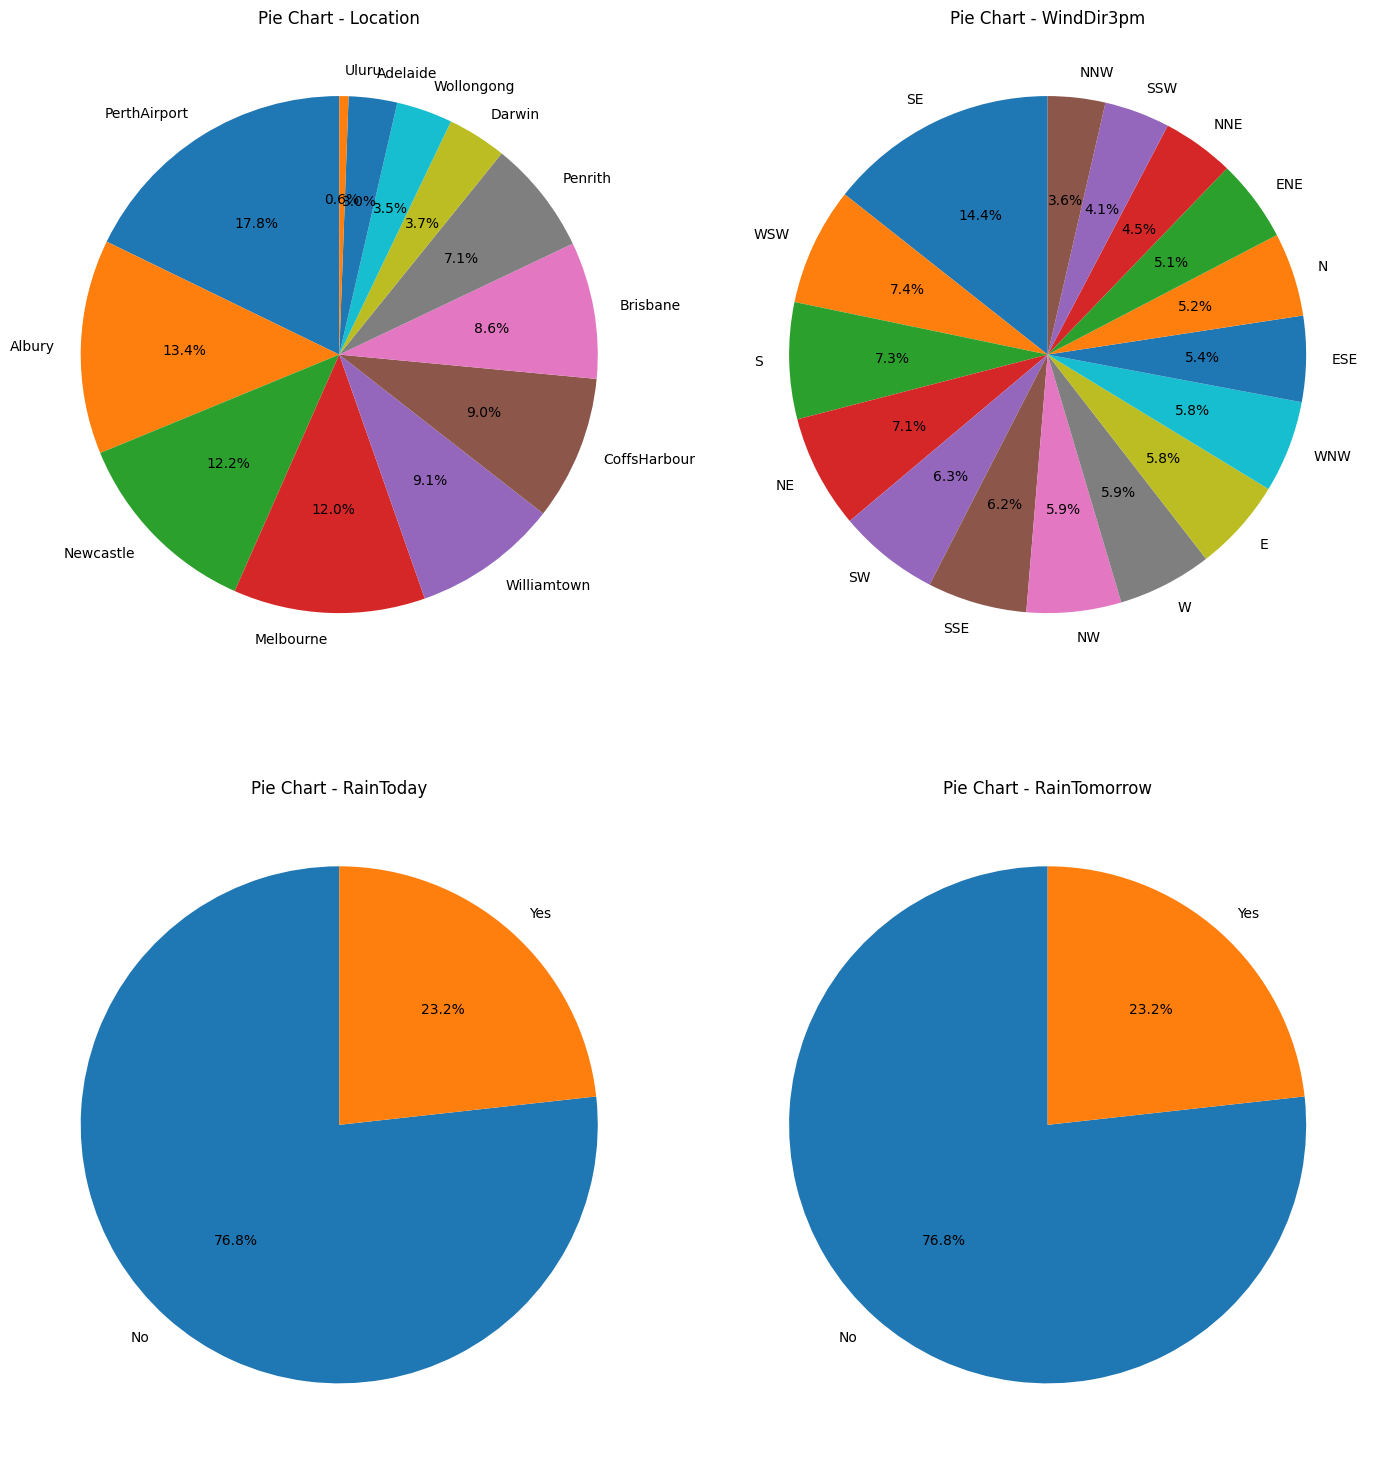

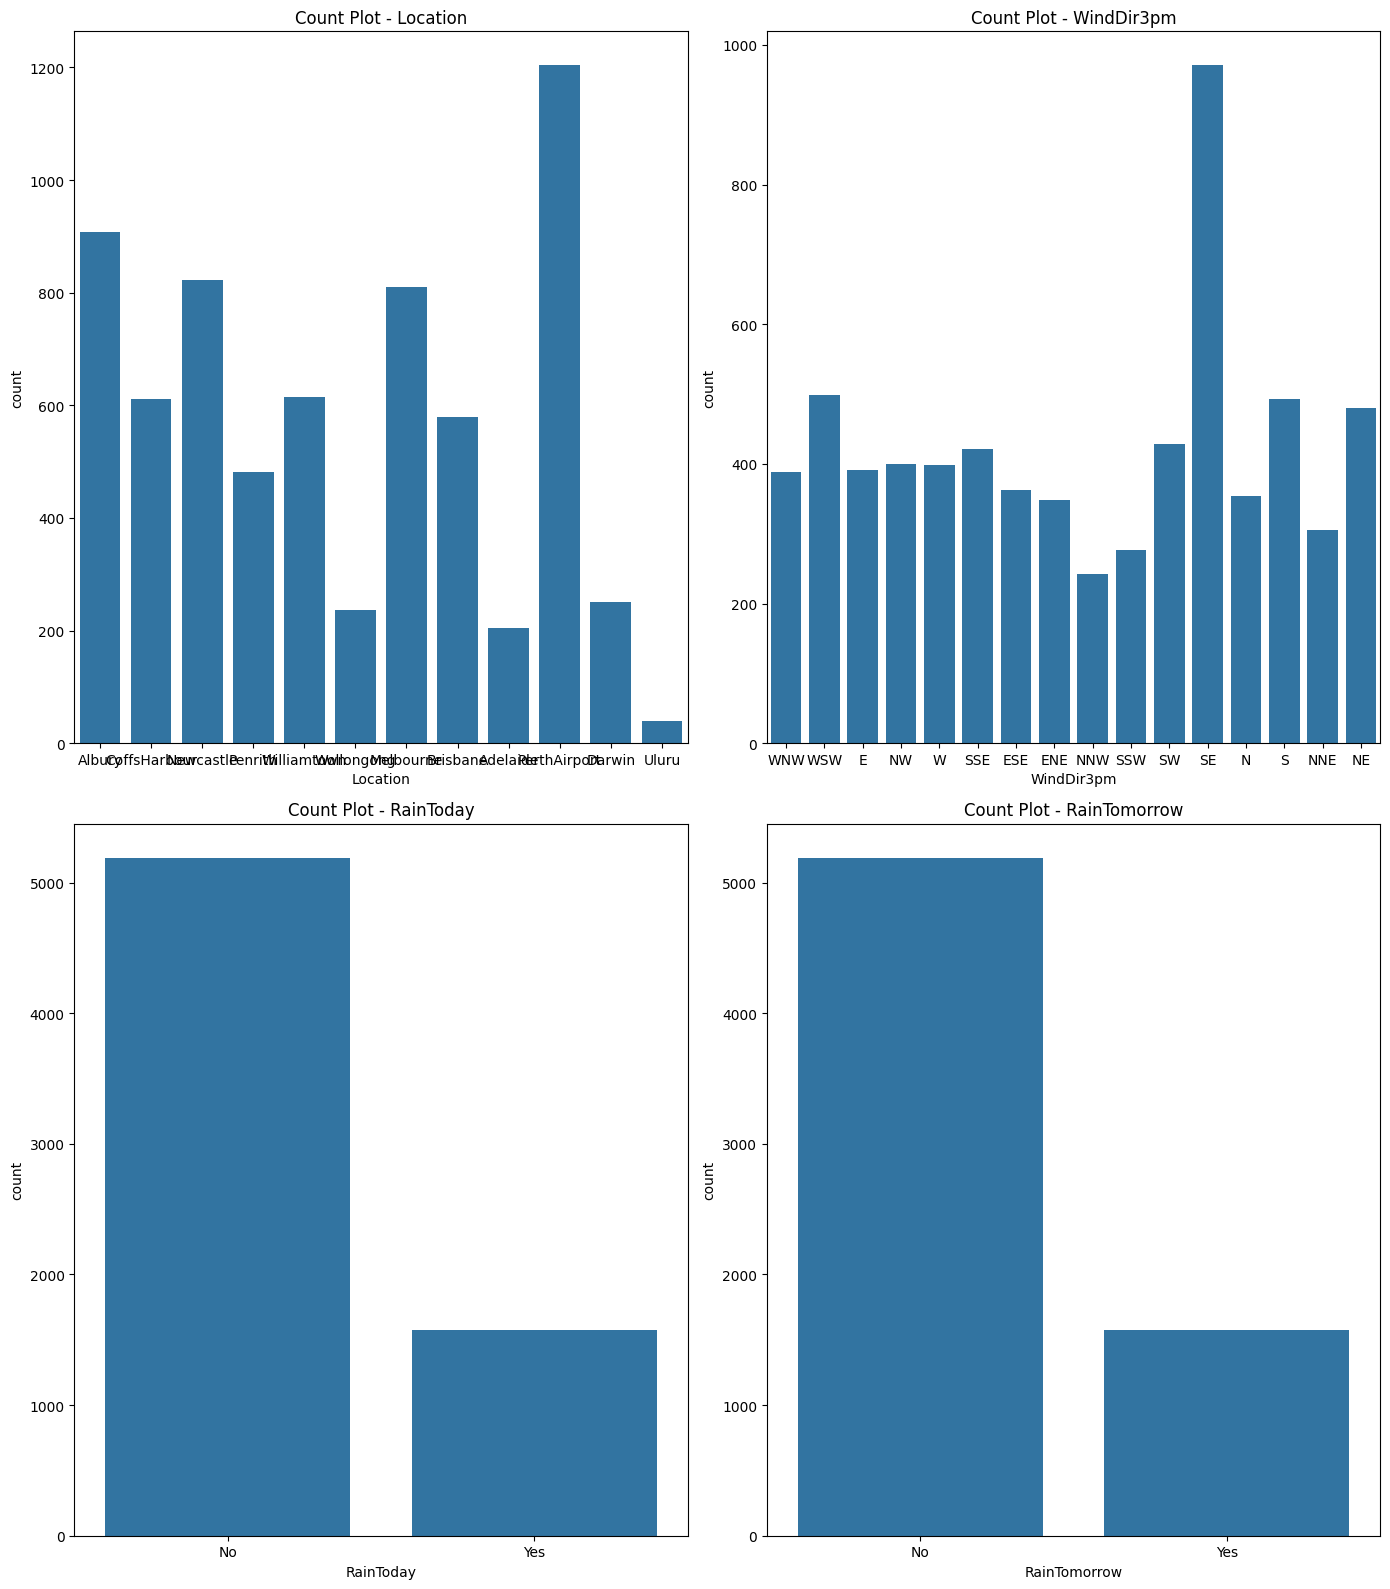

In [21]:

ccol = ['Location', 'WindDir3pm', 'RainToday', 'RainTomorrow']
fig, axes = plt.subplots(len(ccol)//2, 2, figsize=(14, 16))
axes = axes.flatten()

# For pie charts
for i, column in enumerate(ccol):
    df[column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(f'Pie Chart - {column}')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

# For count plots
fig, axes = plt.subplots(len(ccol)//2, 2, figsize=(14, 16))
axes = axes.flatten()

for i, column in enumerate(ccol):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot - {column}')
    axes[i].set_xlabel(column) 

plt.tight_layout()
plt.show()


<Axes: xlabel='WindDir3pm', ylabel='Rainfall'>

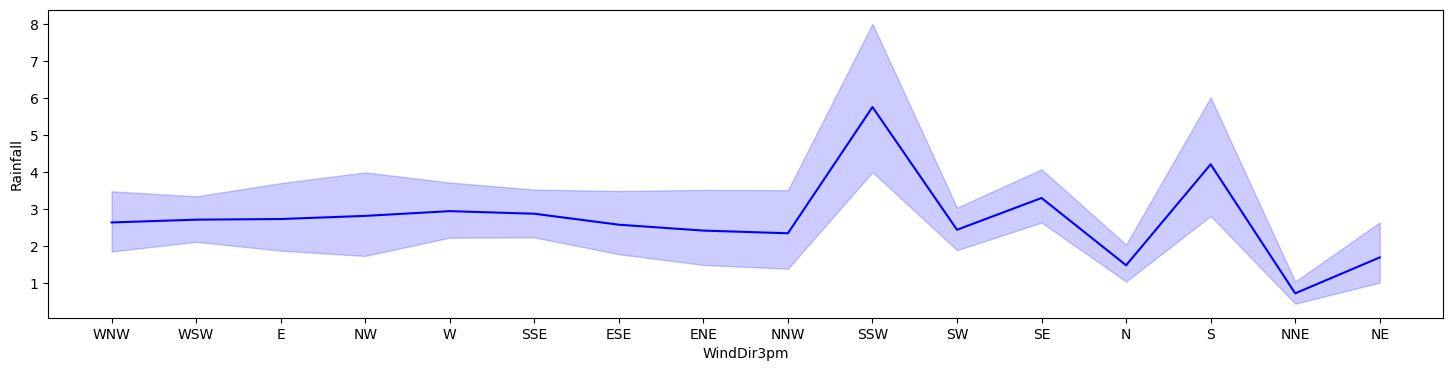

In [22]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df,x='WindDir3pm',y='Rainfall',color='blue')

<Axes: xlabel='Location', ylabel='MaxTemp'>

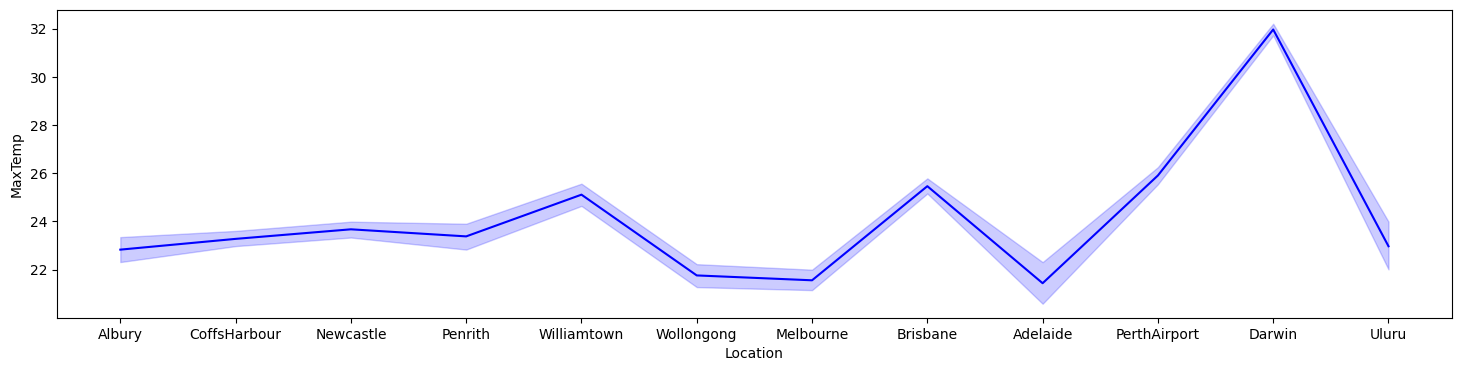

In [23]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df,x='Location',y='MaxTemp',color='blue')

<Axes: xlabel='Location', ylabel='MinTemp'>

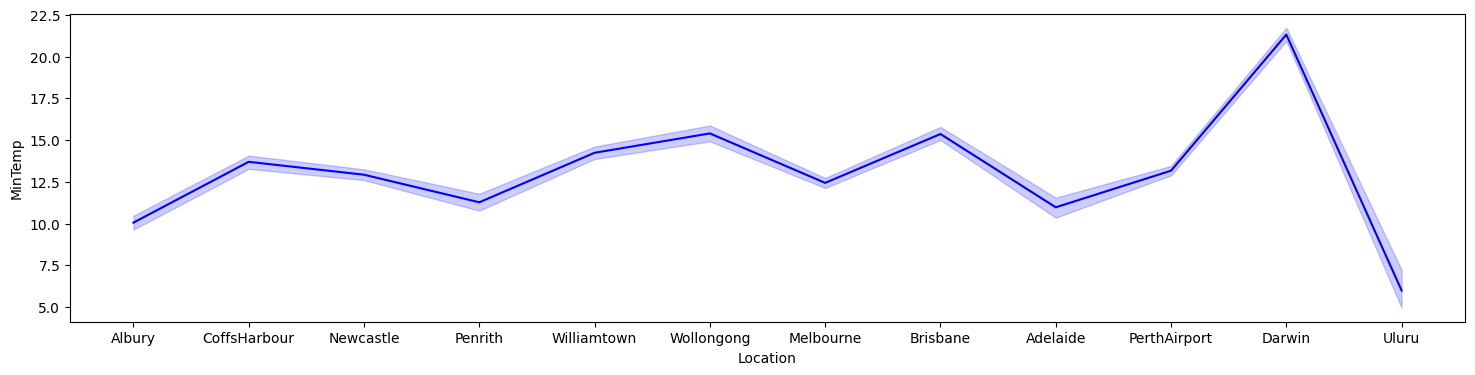

In [24]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df,x='Location',y='MinTemp',color='blue')

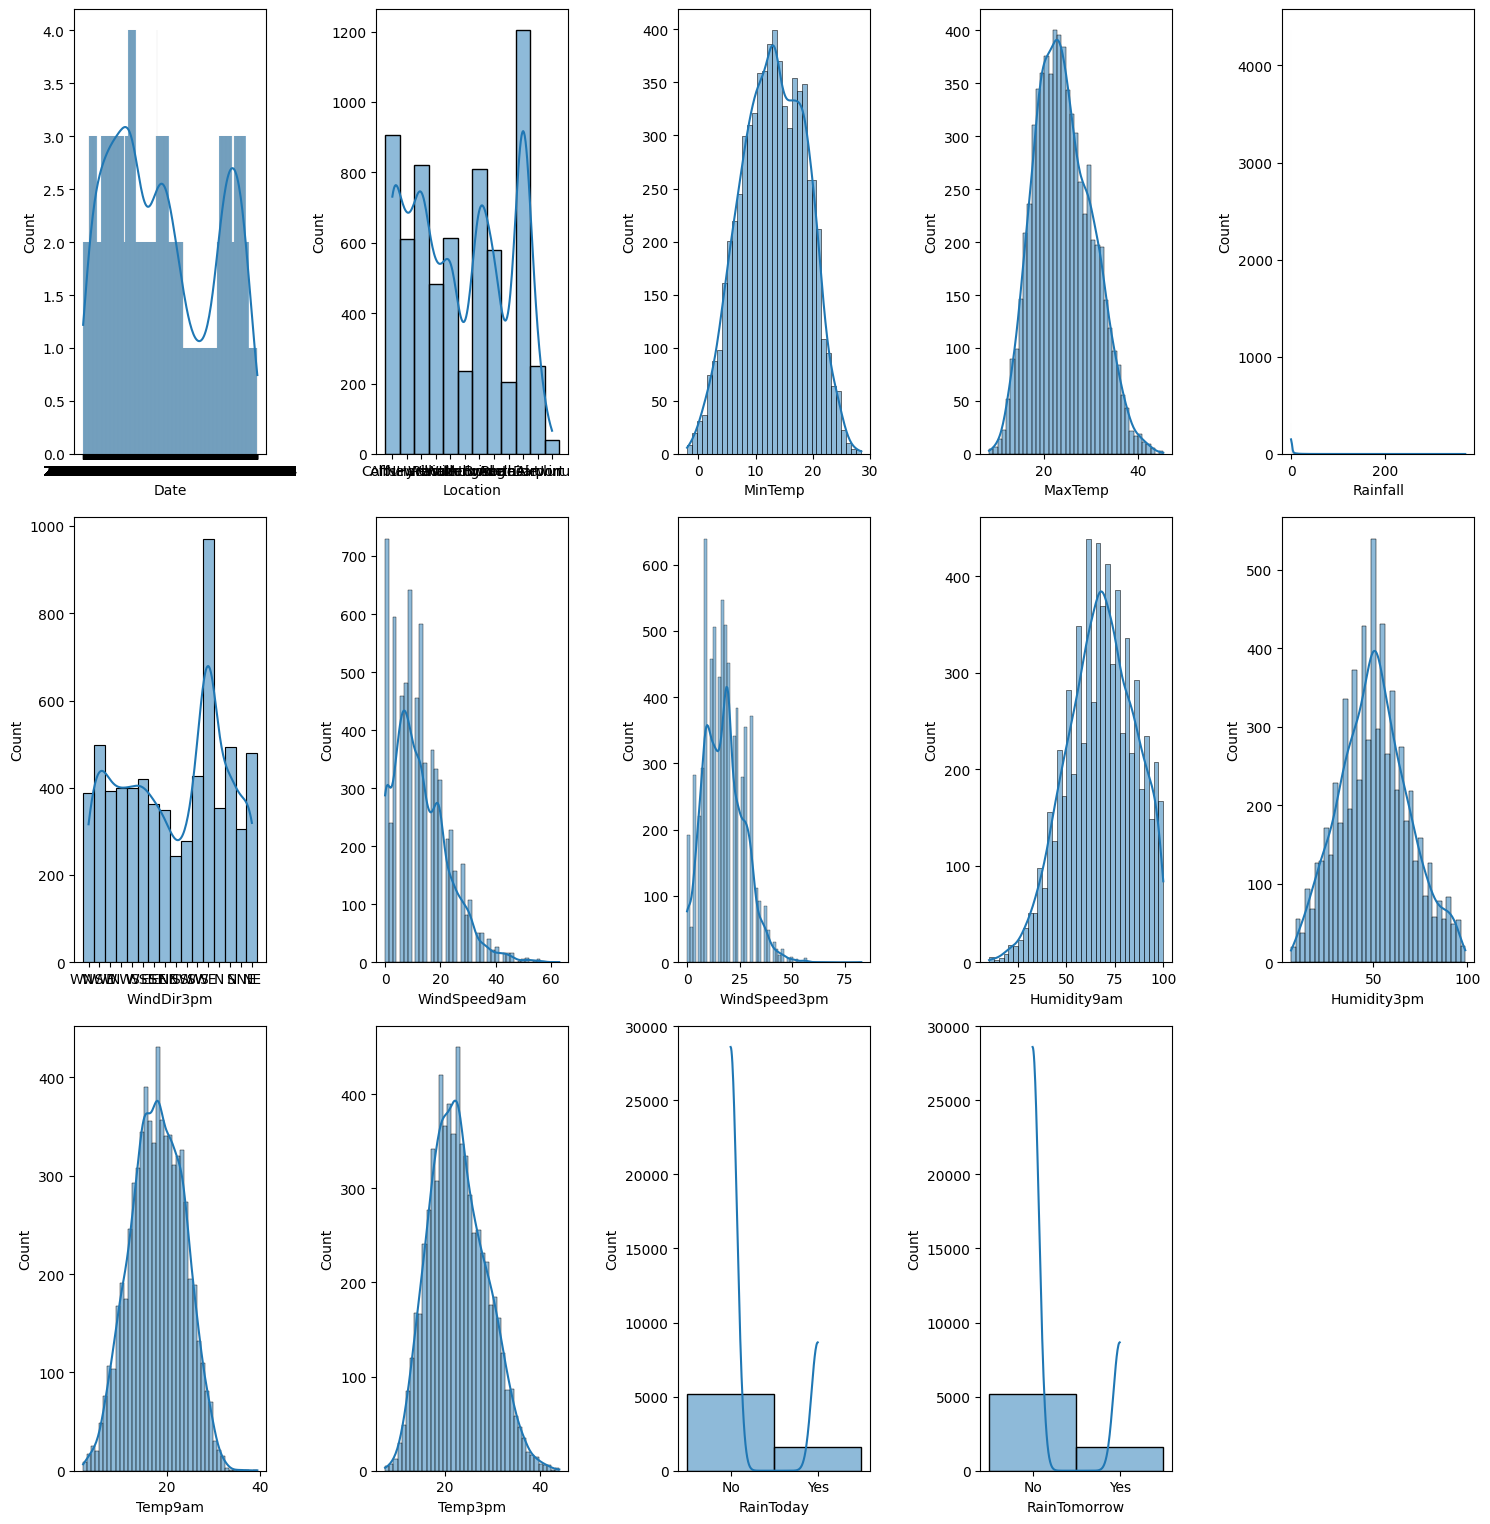

In [25]:
plt.figure(figsize=(15,20))
pltno = 1
for i in df.columns:
    if pltno <= 36:
        ax = plt.subplot(4,5, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

LabelEncode for categorical data

In [26]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0


Outliers

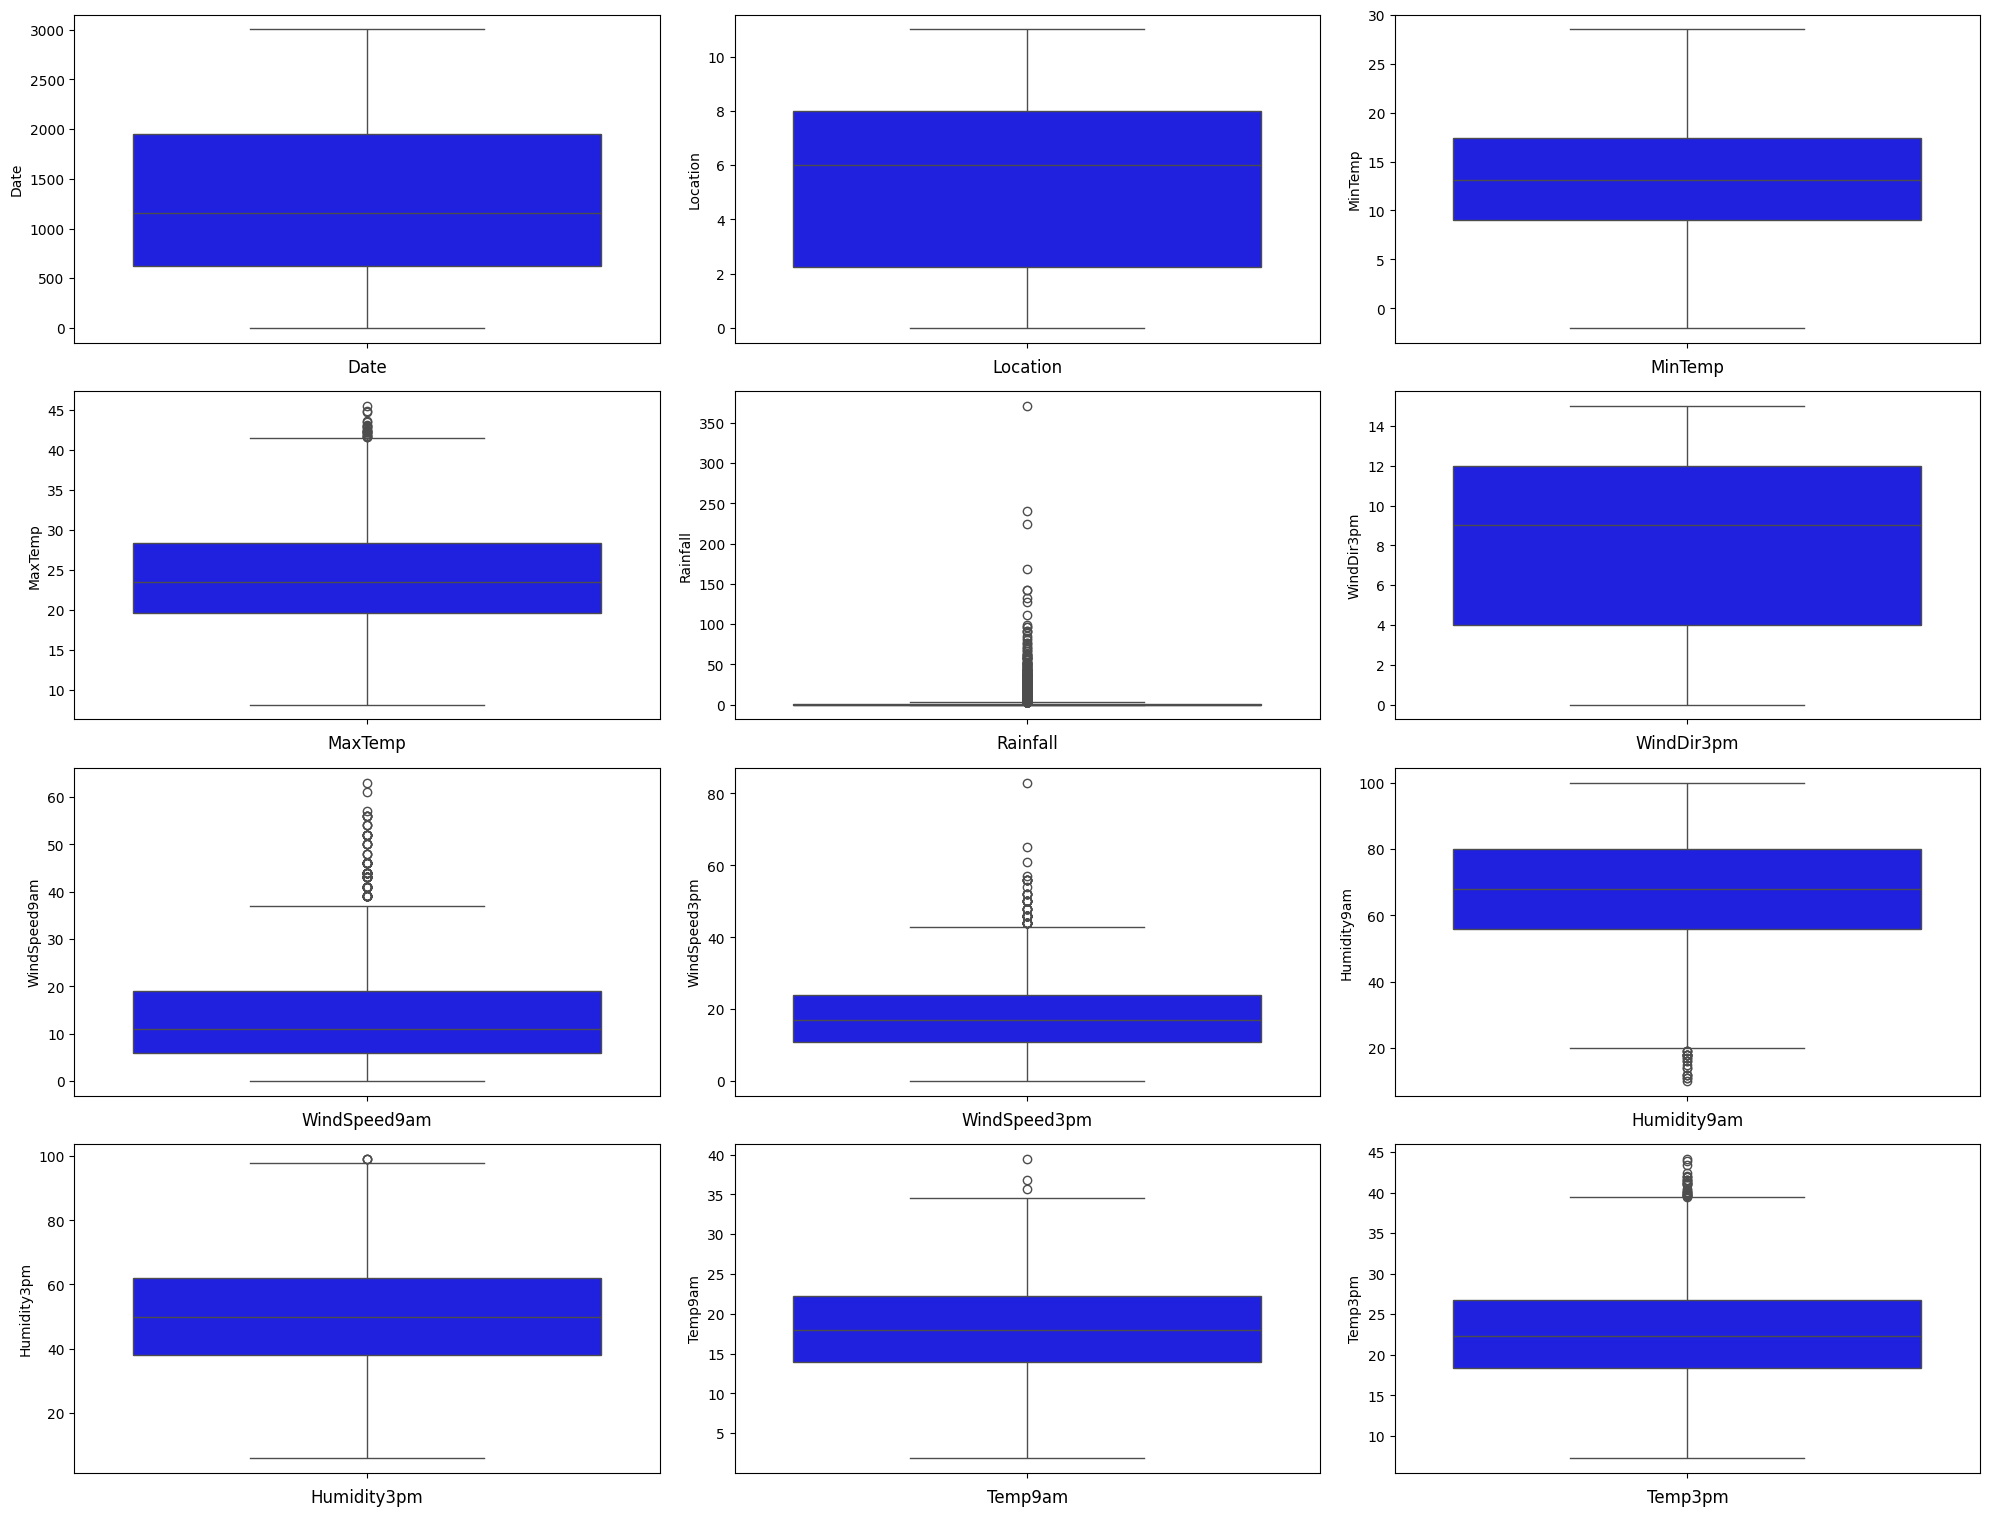

In [27]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [28]:
df.shape

(6762, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 0 to 8424
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6762 non-null   int32  
 1   Location      6762 non-null   int32  
 2   MinTemp       6762 non-null   float64
 3   MaxTemp       6762 non-null   float64
 4   Rainfall      6762 non-null   float64
 5   WindDir3pm    6762 non-null   int32  
 6   WindSpeed9am  6762 non-null   float64
 7   WindSpeed3pm  6762 non-null   float64
 8   Humidity9am   6762 non-null   float64
 9   Humidity3pm   6762 non-null   float64
 10  Temp9am       6762 non-null   float64
 11  Temp3pm       6762 non-null   float64
 12  RainToday     6762 non-null   int32  
 13  RainTomorrow  6762 non-null   int32  
dtypes: float64(9), int32(5)
memory usage: 660.4 KB


In [30]:
ncol = df.select_dtypes(include=['int32', 'float64']).columns

z_scores = zscore(df[ncol])
z= pd.DataFrame(z_scores, columns=ncol)
threshold = 3
df1= df[(np.abs(z_scores) < threshold).all(axis=1)]


In [31]:
df1.shape

(6545, 14)

In [32]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  3.2091097308488616


In [33]:
df=df1

Heatmap for checking correlation

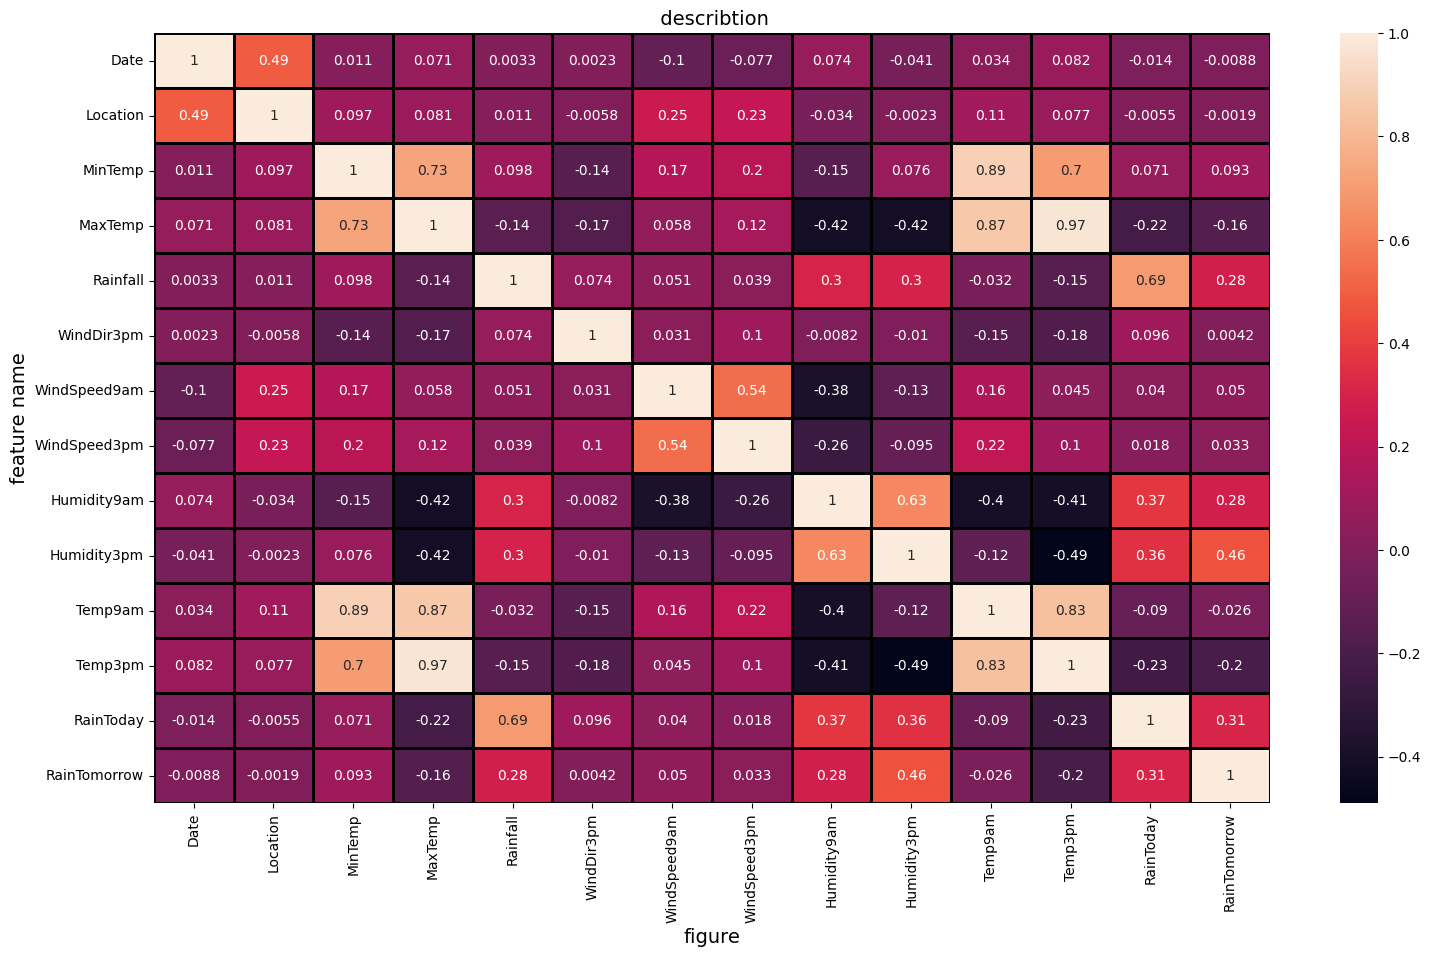

In [34]:
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

In [35]:
df.skew()

Date            0.316721
Location       -0.002813
MinTemp        -0.077728
MaxTemp         0.268362
Rainfall        3.501382
WindDir3pm     -0.129511
WindSpeed9am    0.670872
WindSpeed3pm    0.347307
Humidity9am    -0.232784
Humidity3pm     0.162742
Temp9am        -0.070206
Temp3pm         0.288694
RainToday       1.326487
RainTomorrow    1.314917
dtype: float64

In [36]:
df['Rainfall'] = np.log1p(df['Rainfall'])
df['RainToday'] = np.log1p(df['RainToday'])
df['RainTomorrow'] = np.log1p(df['RainTomorrow'])

In [37]:
df.skew()

Date            0.316721
Location       -0.002813
MinTemp        -0.077728
MaxTemp         0.268362
Rainfall        1.729268
WindDir3pm     -0.129511
WindSpeed9am    0.670872
WindSpeed3pm    0.347307
Humidity9am    -0.232784
Humidity3pm     0.162742
Temp9am        -0.070206
Temp3pm         0.288694
RainToday       1.326487
RainTomorrow    1.314917
dtype: float64

# target :RainToday

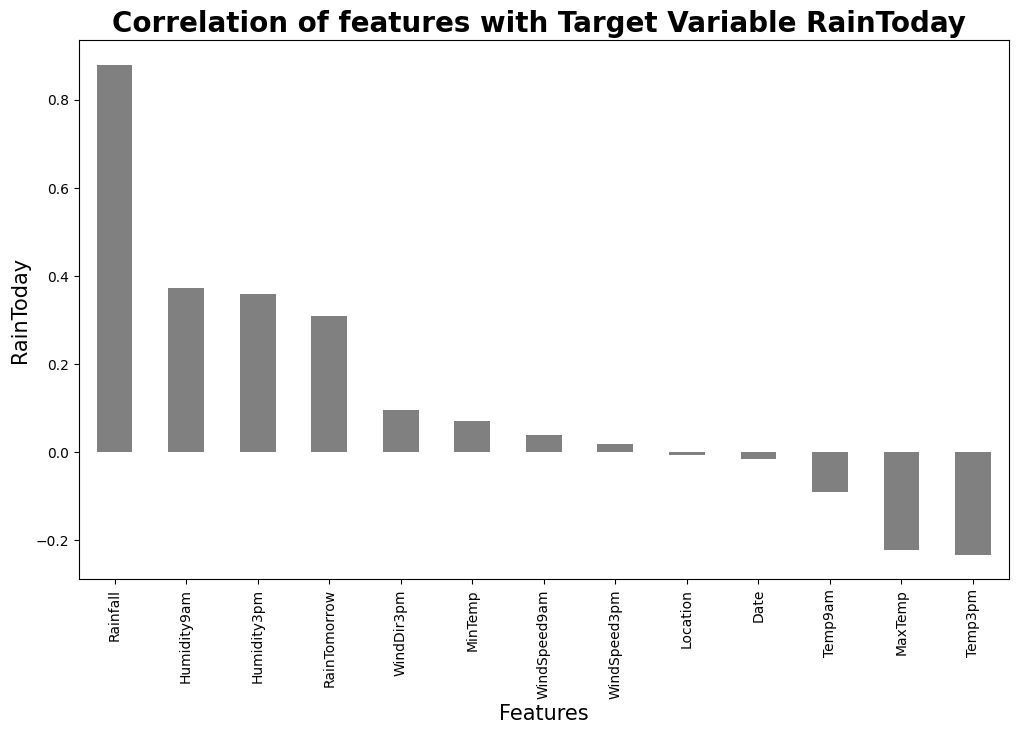

In [38]:
plt.figure(figsize = (12,7))
df.corr()['RainToday'].drop(['RainToday']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15)
plt.ylabel('RainToday',fontsize=15)
plt.title('Correlation of features with Target Variable RainToday ',fontsize = 20,fontweight='bold')
plt.show()

DATA PREPARATION

In [39]:
df.drop(['Location', 'Date'], inplace=True, axis=1)


In [40]:
x=df.drop(['RainToday'],axis=1)
y=df['RainToday']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,0.069031,-0.188910,-0.028026,1.369181,0.850635,0.740768,0.201479,-1.558699,-0.161389,-0.146126,-0.539377
1,-1.012722,0.174513,-0.565051,1.592005,-0.916155,0.521431,-1.393150,-1.394101,-0.108817,0.277914,-0.539377
2,-0.021115,0.273628,-0.565051,1.592005,0.740211,0.960105,-1.747511,-1.119771,0.557086,0.091336,-0.539377
3,-0.688196,0.653570,-0.565051,-1.750347,-0.143184,-0.904261,-1.334089,-1.887894,0.048897,0.651069,-0.539377
4,0.808229,1.363896,0.226936,-0.190583,-0.584882,0.302093,0.851142,-0.955173,-0.003675,1.193839,-0.539377


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,7.589046,MinTemp
1,25.226468,MaxTemp
2,1.411692,Rainfall
3,1.081200,WindDir3pm
4,1.789128,WindSpeed9am
5,1.519665,WindSpeed3pm
6,3.907986,Humidity9am
7,5.425322,Humidity3pm
8,16.644927,Temp9am
9,30.567857,Temp3pm


In [43]:
print(x.shape, y.shape)

(6545, 11) (6545,)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

# Model buidling

In [45]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i  )
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print(" max r2 score : ",maxacc," on random state ", maxrs)

 max r2 score :  0.8005279439223282  on random state  166


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxrs   )

In [47]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [48]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0.69314718, 0.        , 0.69314718, ..., 0.        , 0.        ,
       0.69314718])

In [49]:
value.score(x_train,y_train)

1.0

In [50]:
value.score(x_test,y_test)

0.9994836449221309

In [51]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



Details for each model:
              MAE           MSE          RMSE        R2
dt   3.289403e-16  5.241605e-31  7.239893e-16  1.000000
rf   3.995446e-16  6.968430e-31  8.347712e-16  1.000000
lR   7.318580e-02  1.695374e-02  1.302065e-01  0.800528
svr  7.741072e-02  1.366454e-02  1.168954e-01  0.839228
knn  3.903364e-02  1.517684e-02  1.231943e-01  0.821434
rid  7.319767e-02  1.695377e-02  1.302066e-01  0.800528
ls   2.420513e-01  8.502779e-02  2.915952e-01 -0.000409
gb   6.429220e-06  5.998778e-11  7.745178e-06  1.000000
et   1.150540e-03  4.388659e-05  6.624696e-03  0.999484

Best Model based on RMSE: dt


In [52]:
model_1 = DecisionTreeRegressor()
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE :',mse )
print("RMSE :", rmse)

print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 3.3611945541859373e-16
MAE : 5.35375575839992e-31
RMSE : 7.316936352326649e-16

Training r2 Score : 100.0 %

Testing r2 Score: 100.0%


,Y Test,Pred
6507,0.693147,0.693147
1157,0.000000,0.000000
3264,0.693147,0.693147
6954,0.693147,0.693147
4896,0.693147,0.693147


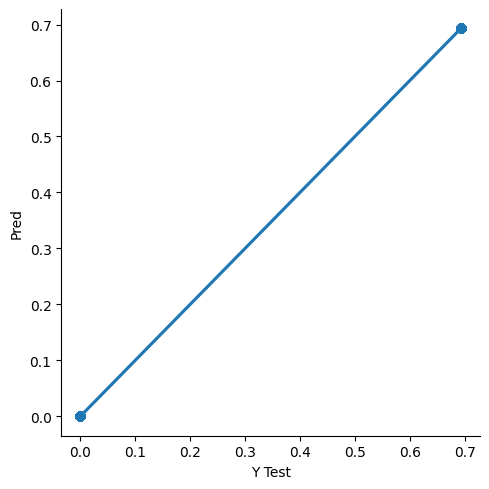

In [53]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [54]:
import joblib
joblib.dump(model_1,"raindaal1.pkl")

['raindaal1.pkl']

# target :RainTomorrow

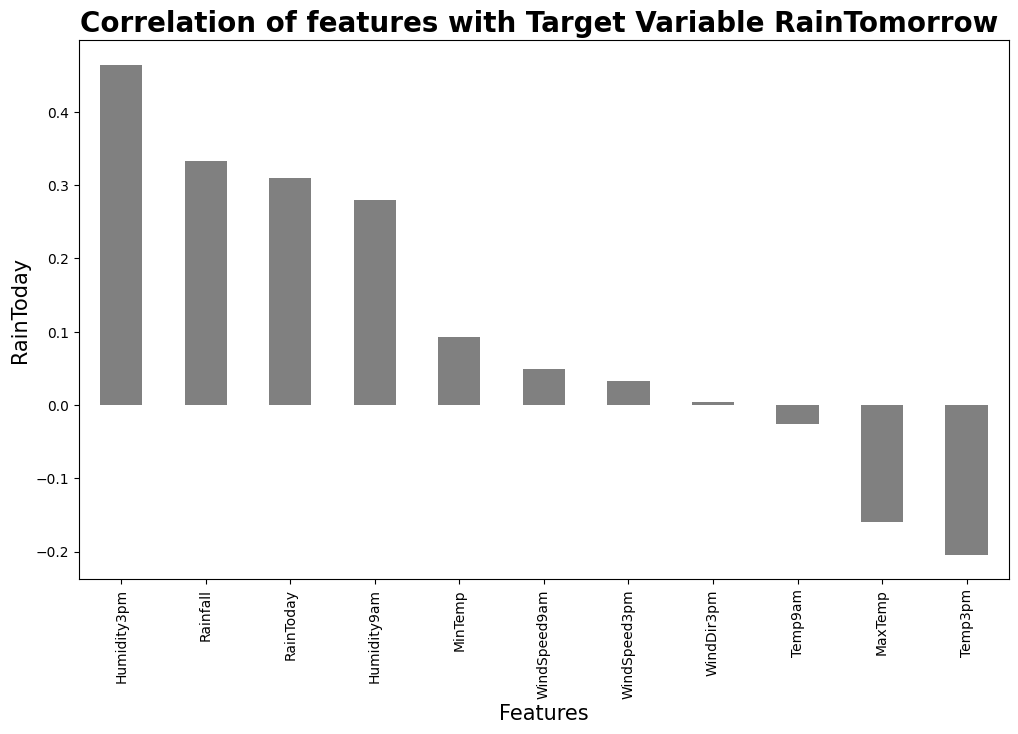

In [55]:
plt.figure(figsize = (12,7))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15)
plt.ylabel('RainToday',fontsize=15)
plt.title('Correlation of features with Target Variable RainTomorrow ',fontsize = 20,fontweight='bold')
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,0.069031,-0.188910,-0.028026,1.369181,0.850635,0.740768,0.201479,-1.558699,-0.161389,-0.146126,-0.539377
1,-1.012722,0.174513,-0.565051,1.592005,-0.916155,0.521431,-1.393150,-1.394101,-0.108817,0.277914,-0.539377
2,-0.021115,0.273628,-0.565051,1.592005,0.740211,0.960105,-1.747511,-1.119771,0.557086,0.091336,-0.539377
3,-0.688196,0.653570,-0.565051,-1.750347,-0.143184,-0.904261,-1.334089,-1.887894,0.048897,0.651069,-0.539377
4,0.808229,1.363896,0.226936,-0.190583,-0.584882,0.302093,0.851142,-0.955173,-0.003675,1.193839,-0.539377


In [57]:
print(x.shape, y.shape)

(6545, 11) (6545,)


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [59]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i  )
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print(" max r2 score : ",maxacc," on random state ", maxrs)

 max r2 score :  0.8005279439223282  on random state  166


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxrs   )

In [61]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [62]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0.69314718, 0.        , 0.69314718, ..., 0.        , 0.        ,
       0.67928424])

In [63]:
value.score(x_train,y_train)

1.0

In [64]:
value.score(x_test,y_test)

0.9996264053004046

In [65]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



Details for each model:
              MAE           MSE          RMSE        R2
dt   3.395677e-16  5.421599e-31  7.363151e-16  1.000000
rf   3.917437e-16  6.712372e-31  8.192907e-16  1.000000
lR   7.318580e-02  1.695374e-02  1.302065e-01  0.800528
svr  7.741072e-02  1.366454e-02  1.168954e-01  0.839228
knn  3.903364e-02  1.517684e-02  1.231943e-01  0.821434
rid  7.319767e-02  1.695377e-02  1.302066e-01  0.800528
ls   2.420513e-01  8.502779e-02  2.915952e-01 -0.000409
gb   6.429220e-06  5.998778e-11  7.745178e-06  1.000000
et   1.023486e-03  3.175295e-05  5.634976e-03  0.999626

Best Model based on RMSE: dt


In [66]:
model_2 = DecisionTreeRegressor()
model_2.fit(x_train,y_train)
y_pred = model_2.predict(x_train)
pred = model_2.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE :',mse )
print("RMSE :", rmse)

print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 3.2645305332027897e-16
MAE : 5.2237809831713754e-31
RMSE : 7.22757288664139e-16

Training r2 Score : 100.0 %

Testing r2 Score: 100.0%


,Y Test,Pred
6507,0.693147,0.693147
1157,0.000000,0.000000
3264,0.693147,0.693147
6954,0.693147,0.693147
4896,0.693147,0.693147


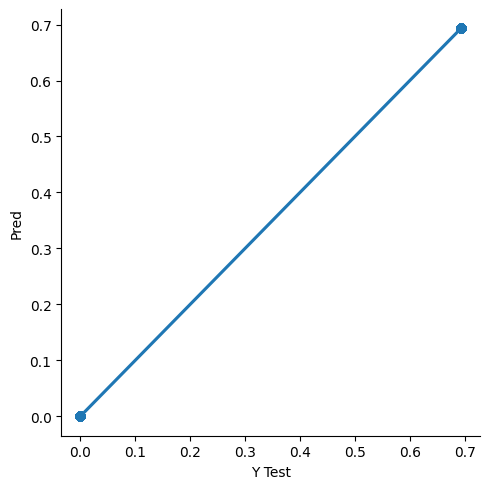

In [67]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [68]:
import joblib
joblib.dump(model_1,"raintom.pkl")

['raintom.pkl']